In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Normal Equation Class

In [26]:
import numpy as np
import math

class NormalEquation:

  #constructor
  def _init_(self):
    self.X = 0

  #Compulsory to pass Y as a row matrix since used to derive the formula used later
  #Compulsory to add the X0 independent feature i.e bias [1 1 1 ...] in data preprocessing step in your table as used to derive the formula used later
  #returns nothing
  def fit(self,X,Y):
    self.X = X          
    self.Y = Y

    # calculating theta using the formula ***(theta) = ((x)t.(x))-1.((x)t.(y)t)**** -- t means transpose --(-1) means inverse
    self.theta = np.dot(np.linalg.inv(np.dot(self.X.transpose(), self.X)), np.dot(self.X.transpose(), self.Y.transpose()))

  # returns an array of [c m1 m2 m3......mn]    
  def coef_(self):       
    return self.theta     

  #returns an array of predicted values
  def predict(self,x_test):
    return np.dot(x_test,self.theta.transpose())

## Gradient Descent Class

In [27]:
import numpy as np

class GradientDescent:

  #constructor
  def _init_(self):
    self.X = 0

  #Compulsory to add the X0 independent feature i.e bias [1 1 1 ...] in data preprocessing step in your table as used to derive the formula used later
  #Compulsory to pass Y as a row matrix since used to derive the formula used later
  #returns nothing
  def fit(self,X,Y,learning_rate = 0.000001,no_of_iterations = 10000):
    self.X = X
    self.Y = Y

    #taking all [c,m1,m2...] as [0,0,0.....] as initial random value and representing this in a matrix named theta
    self.current_theta = np.zeros((self.X.shape[1]))   
    
    #calculating intial error using the formula ***(error) = (X.(theta)t - (Y)t).(X.(theta)t - (Y)t)t*** -- t means transpose -some people divide this by 2
    self.current_error = (np.dot(np.dot(self.X,self.current_theta.transpose()) - self.Y.transpose(),(np.dot(self.X,self.current_theta.transpose()) - self.Y.transpose()).transpose()))/2
    self.error_diff = self.current_error

    # to keep a count of iterations that has occured
    self.no_of_iteration = 0;

    # making a list to store error every 50 iterations
    self.error_every_50_iteration_list = list()
    self.error_every_50_iteration_list.append(self.current_error)

    #iterating utill the difference between two errors is <= 0.001 i.e negligible
    while(self.error_diff > 0.00000001):
      #calculating (theta)new = (theta)current - (leaning rate)(derivative term)
      #(derivative term) = 2*(X)t.(X.(current_theta)-(Y)t) --usually people divide derivative term with (2)
      self.new_theta = self.current_theta - (learning_rate)*(np.dot(self.X.transpose(),(np.dot(self.X,self.current_theta)-self.Y.transpose())))

      #caluclating error using formula ***(error) = (X.(theta)t - (Y)t).(X.(theta)t - (Y)t)t*** -- t means transpose -some people divide this by 2
      self.new_error = (np.dot(np.dot(self.X,self.new_theta.transpose()) - self.Y.transpose(),(np.dot(self.X,self.new_theta.transpose()) - self.Y.transpose()).transpose()))/2

      #updating the error difference
      self.error_diff = self.current_error - self.new_error
      self.current_error = self.new_error
      self.current_theta = self.new_theta
      
      #counting the no of interation taken to run the algorithm
      self.no_of_iteration = self.no_of_iteration + 1

      #storing the error after every 50 iterations
      if(self.no_of_iteration % 50 == 0):
        self.error_every_50_iteration_list.append(self.new_error)

      #breaking if no_of_iteration for achieving error_diff = 0.00000001 exceeds the no_of_iterations specified by user
      if(self.no_of_iteration > no_of_iterations):
        break;

  # returns an array of [c m1 m2 m3......mn]    
  def coef_(self):      
    return self.new_theta

  #returns no of interations taken and also returns an array with error every 50 iteration
  def error_every_50_iteration(self):     
    return self.no_of_iteration,np.array(self.error_every_50_iteration_list)

  #returns an array of predicted values
  def predict(self,x):
    return np.dot(x,self.new_theta.transpose())

## Stochastic Gradient Descent Class

In [28]:
import numpy as np
import random

class StochasticGradientDescent:

  #constructor
  def _init_(self):
    self.X = 0

  #Compulsory to pass Y as a row matrix since used to derive the formula used later
  #Compulsory to add the X0 independent feature i.e bias [1 1 1 ...] in data preprocessing step in your table as used to derive the formula used later
  #returns nothing
  def fit(self,X,Y,learning_rate = 0.000001,no_of_iteration = 10000):
    
    self.X = X
    self.Y = Y

    #taking all [c,m1,m2...] as [0,0,0.....] and representing this in a matrix named theta
    self.current_theta = np.zeros((self.X.shape[1]))   

    # making a list to store error every 50 iterations
    self.error_every_50_iteration_list = list()

    for i in range(no_of_iteration + 1):
      #generating a random point
      self.Xp = list()
      self.Yp = list()
      random_no = random.randint(0,len(self.Y)-1)
      self.Xp.append(X[random_no])
      self.Yp.append(Y[random_no])

      #converting list into numpy array cause numpy is very fast
      self.Xp = np.array(self.Xp)
      self.Yp = np.array(self.Yp)

      #calculating (theta)new = (theta)current - (leaning rate)(derivative term)
      #(derivative term) = 2*(Xp)t.(Xp.(current_theta)-(Yp)t) --usually people divide derivative term with (2)*(no of datapoints) --some people divide it by 2
      self.new_theta = self.current_theta - (learning_rate)*(np.dot(self.Xp.transpose(),(np.dot(self.Xp,self.current_theta)-self.Yp.transpose())))

      #caluclating error using formula ***(error due to all points) = (X.(theta)t - (Y)t).(X.(theta)t - (Y)t)t*** -- t means transpose --some people divide it by 2
      self.error = (np.dot(np.dot(self.X,self.new_theta.transpose()) - self.Y.transpose(),(np.dot(self.X,self.new_theta.transpose()) - self.Y.transpose()).transpose()))/2

      self.current_theta = self.new_theta

      #storing the error after every 50 iterations
      if(i % 50 == 0):
        self.error_every_50_iteration_list.append(self.error)

  #returns an array of estimated parameters [c,m1,m2.....,mn]
  def coef_(self): 
    return self.new_theta

  #returns an array with error every 50 iteration
  def error_every_50_iteration(self):     
    return np.array(self.error_every_50_iteration_list)

  #returns an array of predicted values
  def predict(self,x):     
    return np.dot(x,self.new_theta.transpose())

## Evaluation Metric Class

In [30]:
import numpy as np
import math

#pass y_actual and y_pred as numpy row array
class evaluation_metric:

    #constructor
    def _init_(self):
        self.y_pred = 0
        self.y_actual = 0

    #to caluculate *******root mean squared error = root(mean(sum(square(y_actual - y_pred))))*******
    def rmse(self , y_actual , y_pred):
        self.RMSE = 0;
        self.RMSE = math.sqrt((np.sum(((y_actual - y_pred)*(y_actual - y_pred))))/len(y_actual))
        return self.RMSE

    #to calculate ******* mean squared error = mean(sum(square(y_actual - y_pred))) **********        
    def mse(self , y_actual , y_pred):
        self.MSE = 0;
        self.MSE = np.sum(((y_actual - y_pred)*(y_actual - y_pred)))/len(y_actual)
        return self.MSE

    #to calculate *******total sum of square of residue = 0.5*sum(square(y_actual - y_pred))*********
    def ssres(self , y_actual , y_pred):
        self.SSRES = 0
        self.SSRES = (np.sum((y_actual - y_pred)*(y_actual - y_pred)))/2
        return self.SSRES

# Data Preprocessing 

In [31]:
df = pd.read_csv('dataset/insurance.txt')
df
df.shape

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


(1338, 4)

### normalizing all the columns
X -> (X - mean)/standard deviation

In [32]:
col_names = np.array(df.columns)
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
df.head(10)

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
5,-0.584350,-0.807656,-0.908614,-0.785908
6,0.483668,0.455486,-0.078767,-0.415500
7,-0.157143,-0.479567,1.580926,-0.494728
8,-0.157143,-0.136714,0.751079,-0.567017
9,1.480485,-0.791252,-0.908614,1.293027


### adding bias column

In [33]:
bias = [1 for i in range(1338)]
df.insert(loc = 0 , column = "bias" , value = bias )
df

,bias,age,bmi,children,charges
0,1,-1.438764,-0.453320,-0.908614,0.298584
1,1,-1.509965,0.509621,-0.078767,-0.953689
2,1,-0.797954,0.383307,1.580926,-0.728675
3,1,-0.441948,-1.305531,-0.908614,0.719843
4,1,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...,...
1333,1,0.768473,0.050297,1.580926,-0.220551
1334,1,-1.509965,0.206139,-0.908614,-0.914002
1335,1,-1.509965,1.014878,-0.908614,-0.961596
1336,1,-1.296362,-0.797813,-0.908614,-0.930362


In [34]:
#test_train split of (70:30) we need to put 936 rows in train dataset and rest in test data
df_train = df.iloc[0:936]
df_test = df.iloc[936:]
x_train = np.array(df_train.iloc[:,[0,1,2,3]])
y_train = np.array(df_train.iloc[:,4])
x_test = np.array(df_test.iloc[:,[0,1,2,3]])
y_test = np.array(df_test.iloc[:,4])

# Linear Regression Using Normal_Equation

In [35]:
#creating objects of user defined class
normal_regressor = NormalEquation()
m = evaluation_metric()

In [36]:
#**********************no shuffling********************

#training and printing coefficients
normal_regressor.fit(x_train,y_train)
coef = normal_regressor.coef_()
print('Cofficients : {}'.format(coef))
print('')

#calculating accuracy for training dataset
y_pred_train = normal_regressor.predict(x_train)
#print(y_train)
#print(y_pred_train)
print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
print("")

#calculating accuracy for testing dataset
y_pred_test = normal_regressor.predict(x_test)
#print(y_test)
#print(y_pred_test)
print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
print("")

Cofficients : [-0.02981352  0.2999276   0.15798607  0.03405244]

RMSE--Train: 0.9263889843274103
MSE--Train: 0.858196550283171
Total Error--Train: 401.63598553252405

RMSE--Test: 0.9676250225695413
MSE--Test: 0.9362981843027053
Total Error--Test: 188.19593504484376



In [38]:
#**************************performing 20 shuffles***********************
coefficient_list = list() #to store all the coeff of all 20 difference splits

accuracy_list_train = list() #to store training accuracy of all 20 different splits
accuracy_list_test = list() #to store testing accuracy of all 20 different splits

#making 20 shuffles
for i in range(20): 
  #command used to shuffle dataset
  df_shuffle = df.sample(frac=1) 

  #performing 70:30 test train split
  df_train = df_shuffle.iloc[0:936]
  df_test = df_shuffle.iloc[936:]
  x_train = np.array(df_train.iloc[:,[0,1,2,3]])
  y_train = np.array(df_train.iloc[:,4])
  x_test = np.array(df_test.iloc[:,[0,1,2,3]])
  y_test = np.array(df_test.iloc[:,4])

  #training and storing coefficient
  normal_regressor.fit(x_train,y_train)
  coefficient_list.append(normal_regressor.coef_())

  #calculating accuracy for training dataset
  y_pred_train = normal_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  accuracy_list_train.append(m.ssres(y_train,y_pred_train))

  #calculating accuracy for testing dataset
  y_pred_test = normal_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  accuracy_list_test.append(m.ssres(y_test,y_pred_test))

#printing coefficients
print('Cofficients in each shuffle: {}'.format(coefficient_list))
avg_cofficient = list()
for j in range(4):
  sum = 0
  for i in range(20):
    sum = sum + coefficient_list[i][j]
  avg_cofficient.append(sum/20)
print('Average Cofficients: {}'.format(avg_cofficient))
print("")

#print training accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_train))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_train))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_train))))
print("")

#print training accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_test))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_test))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_test))))
print('')

Cofficients in each shuffle: [array([-0.00980473,  0.24325247,  0.18729735,  0.06237899]), array([0.04243356, 0.27504535, 0.22758588, 0.04929214]), array([-0.01307454,  0.30306201,  0.14187731,  0.05179286]), array([0.00146089, 0.29091345, 0.14798687, 0.04797139]), array([-0.01446793,  0.27287923,  0.1877012 ,  0.05226538]), array([0.01733972, 0.30254218, 0.1670667 , 0.04277124]), array([0.03667795, 0.25995332, 0.19099404, 0.08815804]), array([-0.00368141,  0.28317622,  0.15618593,  0.07176965]), array([-0.01580228,  0.27357095,  0.16723044,  0.0477073 ]), array([-0.02464493,  0.30031808,  0.17173063,  0.05902314]), array([2.31618722e-04, 2.76588361e-01, 1.75091198e-01, 3.36294216e-02]), array([-0.00409829,  0.26208453,  0.16453179,  0.04611234]), array([0.00093144, 0.26975902, 0.17300083, 0.02469852]), array([-0.00556403,  0.25682865,  0.15577541,  0.05211825]), array([-8.25575812e-05,  2.74245585e-01,  1.62477368e-01,  4.15006124e-02]), array([-0.02731766,  0.24202977,  0.17623932,  

# Linear Regression Using Gradient_Descent

In [39]:
#creating objects of the user defined class
gradientdescent_regressor = GradientDescent()
m = evaluation_metric()

*******************Learning Rate = 1e-07 ,  No of Epochs = 50001******************

Error Every 50 Epochs : [462.17166351 461.54537882 460.92559948 ... 401.63856704 401.63854217
 401.63851754]
Cofficients : [-0.02894347  0.29787353  0.15748708  0.03429231]


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

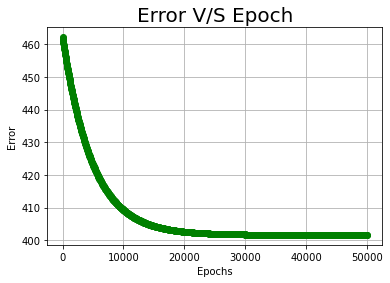

RMSE--Train: 0.926391903849281
MSE--Train: 0.8582019595174956
Total Error--Train: 401.6385170541879

RMSE--Test: 0.9673964019798942
MSE--Test: 0.9358557985636451
Total Error--Test: 188.10701551129267

*******************Learning Rate = 1e-06 ,  No of Epochs = 8263******************

Error Every 50 Epochs : [462.17166351 456.19090182 450.80320745 445.9495811  441.57690923
 437.63737539 434.08793069 430.88981729 428.00813954 425.41147819
 423.07154312 420.96286092 419.06249366 417.34978586 415.80613672
 414.41479522 413.16067557 412.03019124 411.01110553 410.09239704
 409.26413861 408.51738836 407.84409161 407.23699254 406.68955475
 406.19588965 405.7506921  405.34918238 404.98705395 404.6604265
 404.36580359 404.10003455 403.86028013 403.64398168 403.44883323
 403.27275652 403.11387836 402.97051039 402.84113072 402.72436745
 402.61898387 402.52386505 402.43800582 402.36049988 402.29053009
 402.22735964 402.17032408 402.11882425 402.07231979 402.03032335
 401.99239538 401.95813942 401.92

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

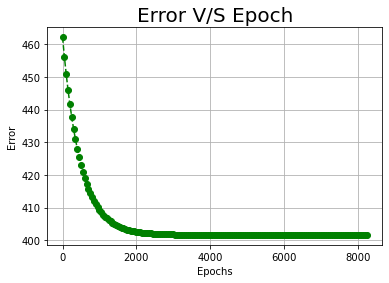

RMSE--Train: 0.9263889906241047
MSE--Train: 0.8581965619495476
Total Error--Train: 401.6359909923883

RMSE--Test: 0.9676114974028989
MSE--Test: 0.9362720099062802
Total Error--Test: 188.19067399116233

*******************Learning Rate = 1e-05 ,  No of Epochs = 950******************

Error Every 50 Epochs : [462.17166351 422.9671404  409.19072324 404.32691425 402.60058099
 401.98418531 401.76263944 401.68243239 401.65316635 401.64239811
 401.63840108 401.63690391 401.63633791 401.63612195 401.6360388
 401.6360065  401.63599385 401.63598885 401.63598687 401.63598607]
Cofficients : [-0.02979538  0.29989989  0.15798815  0.0340627 ]


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

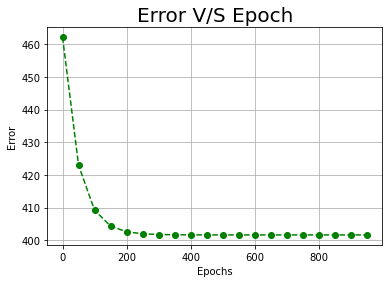

RMSE--Train: 0.9263889849493351
MSE--Train: 0.8581965514354595
Total Error--Train: 401.63598607179506

RMSE--Test: 0.9676205646558285
MSE--Test: 0.9362895571448643
Total Error--Test: 188.19420098611772



In [40]:
#**********************no shuffling********************
#test_train split
df_train = df.iloc[0:936]
df_test = df.iloc[936:]
x_train = np.array(df_train.iloc[:,[0,1,2,3]])
y_train = np.array(df_train.iloc[:,4])
x_test = np.array(df_test.iloc[:,[0,1,2,3]])
y_test = np.array(df_test.iloc[:,4])

#training
learning_rate = [0.0000001,0.000001,0.00001]
for i in learning_rate:
  gradientdescent_regressor.fit(x_train,y_train,i,50000)
  coef = gradientdescent_regressor.coef_()
  no_of_iteration , error_every_50_iteration = gradientdescent_regressor.error_every_50_iteration()
  print("*******************Learning Rate = {} ,  No of Epochs = {}******************".format(i,no_of_iteration))
  print("")
  print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = gradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")
  
  #calculating accuracy for testing dataset
  y_pred_test = gradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

In [43]:
#***************************performing 20 shuffles on train dataset***********************')
coefficient_list = list() #to store all the coeff of all 20 difference splits

accuracy_list_train = list() #to store training accuracy of all 20 different splits 
accuracy_list_test = list() #to store testing accuracy of all 20 different splits 

error_every_50_iteration_list = list() #to store training error for all 20 different splits

#for making 20 shuffles
for i in range(20): 
  #command used to shuffle dataset
  df_shuffle = df.sample(frac=1)

  #performing 70:30 test train split 
  df_train = df_shuffle.iloc[0:936]
  df_test = df_shuffle.iloc[936:]
  x_train = np.array(df_train.iloc[:,[0,1,2,3]])
  y_train = np.array(df_train.iloc[:,4])
  x_test = np.array(df_test.iloc[:,[0,1,2,3]])
  y_test = np.array(df_test.iloc[:,4])

  #training and storing coefficients
  gradientdescent_regressor.fit(x_train,y_train)
  coefficient_list.append(gradientdescent_regressor.coef_())

  #calculating error for training dataset
  no_of_iteration , error_every_50_iteration = gradientdescent_regressor.error_every_50_iteration()
  error_every_50_iteration_list.append(error_every_50_iteration)

  #calculating accuracy for training dataset
  y_pred_train = gradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  accuracy_list_train.append(m.ssres(y_train,y_pred_train))

  #calculating accuracy for testing dataset
  y_pred_test = gradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  accuracy_list_test.append(m.ssres(y_test,y_pred_test))

#printing coefficients
print('Cofficients in each shuffle: {}'.format(coefficient_list))
avg_cofficient = list()
for j in range(4):
  sum = 0
  for i in range(20):
    sum = sum + coefficient_list[i][j]
  avg_cofficient.append(sum/20)
print('Average Cofficients: {}'.format(avg_cofficient))
print("")

#printing errors in each shuffle
for i in range(20):
  print("Error in {} shuffle: [{}  {}  {}.....{}  {}  {}]".format(i+1,error_every_50_iteration_list[i][0],error_every_50_iteration_list[i][1],error_every_50_iteration_list[i][2],error_every_50_iteration_list[i][17],error_every_50_iteration_list[i][18],error_every_50_iteration_list[i][20]))
print("")

#print training accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_train))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_train))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_train))))
print("")

#print testing accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_test))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_test))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_test))))
print('')

Cofficients in each shuffle: [array([0.02016979, 0.25550031, 0.19998188, 0.05489368]), array([0.00915444, 0.26320084, 0.16430426, 0.06663417]), array([-0.02610469,  0.26820768,  0.16008741,  0.04882509]), array([-0.01009396,  0.27762889,  0.15980168,  0.06007429]), array([-0.00344523,  0.28489154,  0.15923448,  0.02726455]), array([0.01149516, 0.29820401, 0.17797235, 0.05078658]), array([-0.00908037,  0.28619052,  0.15163268,  0.04414122]), array([0.00420613, 0.27429257, 0.16156461, 0.03211557]), array([0.00150524, 0.26630782, 0.17987109, 0.08663333]), array([-0.00030624,  0.295577  ,  0.15536543,  0.05707989]), array([-0.00572028,  0.29597394,  0.13523253,  0.06699891]), array([-0.02816329,  0.31944816,  0.15630544,  0.06016399]), array([-0.00532252,  0.28590164,  0.15143339,  0.06157076]), array([-0.00916107,  0.27319769,  0.13592357,  0.06374524]), array([0.00069414, 0.27260347, 0.16276272, 0.04730472]), array([0.01504648, 0.27649241, 0.1839507 , 0.05396132]), array([-0.01244023,  0

# Linear Regression Using Stochastic_Gradient_Descent

In [44]:
#creating objects of the user defined class
stochasticgradientdescent_regressor = StochasticGradientDescent()
m = evaluation_metric()

**************************Learning Rate = 0.0001, No of Epochs = 20000*************************
Error Every 50 Epochs : [462.15836859 461.4303836  461.14971223 460.89476961 460.30976177
 459.33525172 458.99050859 458.72612088 458.46486448 457.89244046
 457.49953935 457.23605973 456.33046076 455.97799751 455.12434411
 454.34631373 453.9984237  453.07187299 452.93945204 452.69601134
 452.38093456 451.99297436 451.61152818 451.0294817  450.31991923
 450.29573009 449.97645105 449.38734805 448.87406146 448.44536921
 447.55309137 447.29244429 446.65139251 445.78994525 444.86095576
 444.50004563 444.1555715  443.80556558 443.52339077 443.01341639
 442.34578535 441.55175931 441.02449146 440.69652989 439.6916637
 439.55163781 439.02784726 438.61361237 438.20094512 437.73155348
 437.64416235 437.1827121  436.99243907 436.25347909 436.09782792
 435.57496915 435.22819237 434.67932114 434.31258996 433.76554176
 433.52441704 433.46799549 432.90917982 432.57299746 432.41864628
 432.02058213 431.28502

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

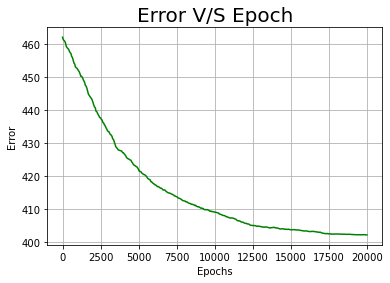

RMSE--Train: 0.9269013577442345
MSE--Train: 0.8591461269881054
Total Error--Train: 402.08038743043335

RMSE--Test: 0.9672138055155437
MSE--Test: 0.93550254557986
Total Error--Test: 188.03601166155187

**************************Learning Rate = 0.001, No of Epochs = 20000*************************
Error Every 50 Epochs : [461.77138313 453.25215063 445.17311125 442.13413248 435.8221483
 435.39180515 431.75660226 428.24555323 425.52674669 425.10032134
 422.14934804 421.32141105 420.46474355 417.30185505 415.59682633
 414.14166613 414.57006707 415.3454075  414.16354517 413.84297363
 413.44587192 410.76266172 408.02505739 407.98046138 407.48660298
 406.44465148 406.23057411 405.679326   404.74687772 404.16433509
 404.57568699 404.10308917 404.70060134 404.89854569 404.77950995
 404.78561268 404.05644118 404.26047997 404.12592568 403.88201107
 403.92726042 404.71402575 404.36153447 404.15487801 403.59041436
 403.22911111 402.9499359  402.98267844 403.16573916 403.32969931
 403.13849739 402.480

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

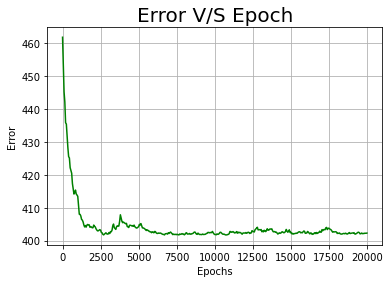

RMSE--Train: 0.9271454674551752
MSE--Train: 0.8595987178226754
Total Error--Train: 402.2921999410121

RMSE--Test: 0.9697097716041208
MSE--Test: 0.9403370411445161
Total Error--Test: 189.00774527004774

**************************Learning Rate = 0.01, No of Epochs = 20000*************************
Error Every 50 Epochs : [462.89335255 415.2873311  403.97012606 419.11491991 413.20468078
 407.24345546 406.17472437 405.81710649 404.0550123  412.83734512
 411.73294335 412.54324634 431.19625164 419.38639341 407.71389777
 405.02724073 410.89428699 407.96155457 423.00641654 408.17856251
 412.3669612  408.25611272 411.00767425 413.08780379 427.3063637
 415.67898548 406.49087563 412.06573168 407.54436956 416.11564083
 410.74633992 405.51032721 406.94640679 410.21378531 409.94634446
 407.79862328 405.55866447 410.80642046 406.12614013 415.51569813
 406.81382132 405.12566706 408.43522671 409.57984791 404.77466065
 412.28264638 407.81771096 403.79371973 403.4946662  403.79892527
 403.84675646 408.981

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Epoch')

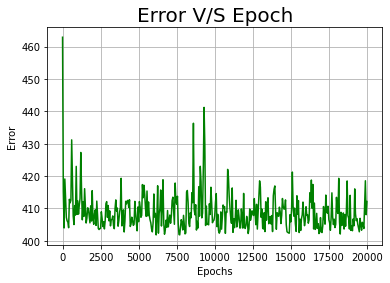

RMSE--Train: 0.9384352124432381
MSE--Train: 0.8806606479533855
Total Error--Train: 412.1491832421844

RMSE--Test: 0.9816635860408025
MSE--Test: 0.9636633961584881
Total Error--Test: 193.6963426278561



In [45]:
#**********************no shuffling********************
#test train split
df_train = df.iloc[0:936]
df_test = df.iloc[936:]
x_train = np.array(df_train.iloc[:,[0,1,2,3]])
y_train = np.array(df_train.iloc[:,4])
x_test = np.array(df_test.iloc[:,[0,1,2,3]])
y_test = np.array(df_test.iloc[:,4])

#training
learning_rate = [0.0001,0.001,0.01]
for i in learning_rate:
  print("**************************Learning Rate = {}, No of Epochs = 20000*************************".format(i))
  stochasticgradientdescent_regressor.fit(x_train,y_train,i,20000)
  coef = stochasticgradientdescent_regressor.coef_()
  error_every_50_iteration = stochasticgradientdescent_regressor.error_every_50_iteration()
  print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green')
  plt.grid(True)
  plt.show()

#calculating accuracy of training dataset
  y_pred_train = stochasticgradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

#calculating accuracy of testing dataset
  y_pred_test = stochasticgradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

In [46]:
#**************************performing 20 shuffles on train dataset***********************')
coefficient_list = list() #to store all the coeff of all 20 difference splits

accuracy_list_train = list() #to store training accuracy of all 20 different splits 
accuracy_list_test = list() #to store testing accuracy of all 20 different splits 

error_every_50_iteration_list = list() #to store training error for all 20 different splits

#for making 20 shuffles
for i in range(20): 
  #command used to shuffle dataset
  df_shuffle = df.sample(frac=1) 

  #performing 70:30 test train split
  df_train = df_shuffle.iloc[0:936]
  df_test = df_shuffle.iloc[936:]
  x_train = np.array(df_train.iloc[:,[0,1,2,3]])
  y_train = np.array(df_train.iloc[:,4])
  x_test = np.array(df_test.iloc[:,[0,1,2,3]])
  y_test = np.array(df_test.iloc[:,4])

  #training and storing coefficients
  stochasticgradientdescent_regressor.fit(x_train,y_train,0.001,20000)
  coefficient_list.append(stochasticgradientdescent_regressor.coef_())

  #calculating error for training dataset
  error_every_50_iteration = stochasticgradientdescent_regressor.error_every_50_iteration()
  error_every_50_iteration_list.append(error_every_50_iteration)

  #calculating accuracy for training dataset
  y_pred_train = stochasticgradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  accuracy_list_train.append(m.ssres(y_train,y_pred_train))

  #calculating accuracy for testing dataset
  y_pred_test = stochasticgradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  accuracy_list_test.append(m.ssres(y_test,y_pred_test))

#printing coefficients
print('Cofficients in each shuffle: {}'.format(coefficient_list))
avg_cofficient = list()
for j in range(4):
  sum = 0
  for i in range(20):
    sum = sum + coefficient_list[i][j]
  avg_cofficient.append(sum/20)
print('Average Cofficients: {}'.format(avg_cofficient))
print("")

#printing errors in each shuffle
for i in range(20):
  print("Error in {} shuffle: [{}  {}  {}.....{}  {}  {}]".format(i+1,error_every_50_iteration_list[i][0],error_every_50_iteration_list[i][1],error_every_50_iteration_list[i][2],error_every_50_iteration_list[i][17],error_every_50_iteration_list[i][18],error_every_50_iteration_list[i][20]))
print("")

#print training accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_train))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_train))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_train))))
print("")

#print testing accuracy
print('Total Error in each shuffle -- Train: {}'.format(accuracy_list_test))
print('Mean Total Error -- Train: {}'.format(np.mean(np.array(accuracy_list_test))))
print('Variance in Total Error -- Train: {}'.format(np.var(np.array(accuracy_list_test))))
print('')

Cofficients in each shuffle: [array([-0.00661735,  0.27765832,  0.17451124,  0.0503359 ]), array([-0.04371584,  0.29121083,  0.20336191,  0.04561273]), array([-0.00230836,  0.27466332,  0.09790534,  0.08301633]), array([-0.00402258,  0.29364895,  0.13574767,  0.06335192]), array([-0.05065802,  0.26150642,  0.17808942,  0.0508501 ]), array([-0.03063917,  0.26021071,  0.13892415,  0.03690081]), array([0.02698566, 0.24799863, 0.19630132, 0.08692665]), array([-0.00342726,  0.24613936,  0.16934496,  0.06804399]), array([-0.02441421,  0.24443258,  0.1651335 ,  0.03147703]), array([-0.04861707,  0.24502139,  0.1410221 ,  0.0885313 ]), array([0.02816179, 0.23584528, 0.20299621, 0.07838585]), array([-0.02904276,  0.2722185 ,  0.10562816,  0.05988208]), array([-0.02594339,  0.22426358,  0.14910836,  0.02593535]), array([-0.01174855,  0.34354697,  0.13442686,  0.07176717]), array([0.02607607, 0.27267154, 0.17941142, 0.06720438]), array([-0.04950267,  0.2669765 ,  0.14936567,  0.06918962]), array(